
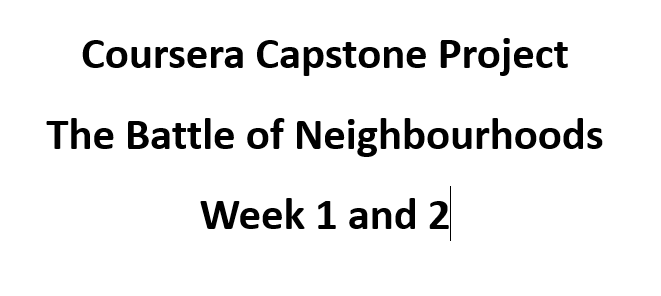



# As part of the final project, I have chosen to explore suitable new store locations for a Fashion Retail chain in the city of Toronto. 

# **Introduction and Business Objective**
Business objective of this project is to assist Fashion retailer to make data-driven decisions on the new locations that are most suitable for their new stores in Toronto. This will be a major part of their decision-making process, the other being on the ground qualitative analysis of districts once this data and report are reviewed and studied.
Toronto, the capital of the province of Ontario, is a major Canadian city along Lake Ontario’s north western shore. It's a dynamic metropolis with a core of soaring skyscrapers, all dwarfed by the iconic, free-standing CN Tower. Toronto also has many green spaces, from the orderly oval of Queen’s Park to 400-acre High Park and its trails, sports facilities and zoo.
Fashion retailer planning to explore locations in Toronto city’s four Boroughs - East Toronto, Central Toronto, Downtown Toronto, West Toronto.
Also, as study suggests locations with coffee shops, café and restaurants provides a good exposure to store. customers will choose to buy product when they see Fashion retailer sign. Therefore, the more people that drive or walk by store the more customers likely to attract. 
Another point to be considered is to place store at a point which has businesses around that can eventually help drive traffic into new store. Any business or category of product that is closely related can help new store business. 
So, in summary we will be looking for new store locations with below criteria:
 - Location with coffee shops or café or restaurants.
 - Location must have Fashion retail store / clothing store.
 - Location must be from one of the four Boroughs - East Toronto, Central Toronto, Downtown Toronto, West Toronto.


# **Data Requirement**
 - Toronto City data that contains list Boroughs, Neighbourhoods along with their Postcodes scrapped from https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&direction=next&oldid=942655364 
 - GeoSpace data that’s contains postcodes along with their latitude and longitude scrapped from  http://cocl.us/Geospatial_data
 - Venues in each neighbourhood of Toronto city with the help of Foursquare API.



# **Data importing, wrangling & cleaning**

# Importing required libraries 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library



print('Libraries imported.')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Libraries imported.


# Downloading Toronto city data containing Postal Code, Borough and Neighbourhood information and reading it into Panda data frame. 
#This will give us our raw data frame with 287 rows and 3 features. 


In [2]:
url_html='https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&direction=next&oldid=942655364'

df = pd.read_html(url_html)

df_postcodes=df[0]

print("imported dataframe has",df_postcodes['Postcode'].count(), "postcodes entries")

df_postcodes.head(10)

imported dataframe has 287 postcodes entries


,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
8,M8A,Not assigned,Not assigned
9,M9A,Etobicoke,Islington Avenue


In [3]:
# creating one back-up copy of raw data frame - df_postcodes.  
df_pc_copy = df_postcodes.copy()
print(df_pc_copy.shape)
df_pc_copy.head()


(287, 3)


,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


# **Exploring, Wrangling and cleaning the data**

# Identifying and cleaning unnecessary data.
To begin with I can start identifying records with "Not assigned" value in columns – Neighbourhood and Borough. As this value is of no use for our data analysis purpose. 

Once all the records identified with "Not assigned" value, I can start with the clean-up activity. 


In [4]:
# Create a data frame with records having "Not assigned" value for better analysis. 
# Below data frame is having all the records from raw data frame with "Not assigned" value in Neighbourhood column.
df_pc_na = df_pc_copy[df_pc_copy["Neighbourhood"]== "Not assigned"].reset_index(drop=True)
print(df_pc_na.shape)
df_pc_na.head()

(77, 3)


,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M8A,Not assigned,Not assigned
3,M2B,Not assigned,Not assigned
4,M7B,Not assigned,Not assigned


Data frame created in above step is having 77 records in total which is indicating that raw data frame is having "Not assigned" value in Neighbourhood column.

In [5]:
# Indentifying "Not assigned" value in Borough column in above newly cerated data frame 
df_pc_na["Borough"].unique()


array(['Not assigned'], dtype=object)

above result indicates that all the records in above data frame with "Not assigned" value in Neighbourhood column is having "Not assigned" value in Borough column as well.

In [6]:
#Repeat above 2 steps for all the records from raw data frame with "Not assigned" value in Borough column.
df_pc_na_1 = df_pc_copy[df_pc_copy["Borough"]== "Not assigned"].reset_index(drop=True)
df_pc_na_1["Neighbourhood"].unique()

array(['Not assigned'], dtype=object)

above result indicates that all the records in above data frame with "Not assigned" value in Borough column is having "Not assigned" value in  Neighbourhood column as well.

So now we can conclude that there wont be data loss if we remove records with "Not assigned" value from Raw data frame.

Next step would be to clean up these value.

In [7]:
#create a cleaned-up data frame after removing "Not assigned" value.
df_pc=df_pc_copy[df_pc_copy["Neighbourhood"]!= "Not assigned"]
print(df_pc.shape)
df_pc.head()

(210, 3)


,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


we now have a cleaned-up dataframe with 210 records.

as we can see in above example 2 different value of Neighbouhoods are present for same Postcode and Borough. 

so to further refine data frame these 2 different values will be joined in one row by comma seperating them.

In [8]:
tor_pc = df_pc.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()
print(tor_pc.shape)
tor_pc.head()

(103, 3)


,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


Importing GeoSpace data into data frame that contains postcodes along with their latitude and longitude

In [9]:
geo_data = pd.read_csv("http://cocl.us/Geospatial_data")
geo_data.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


Merging Geospace data with cleaned-up Toronto city data.

This merge data frame will have all the required Toronto city details - Postal Code, Borough, Neighbourhood, Latitude & Longitude.

In [10]:
tor_geo_merge = pd.merge(tor_pc, geo_data, left_on='Postcode', right_on='Postal Code', how='left')
print(tor_geo_merge.shape)
tor_geo_merge.head()

(103, 6)


,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476


In [11]:
#removing duplicate columns from merged data frame as both having postal code information.
tor_geo_merge.drop(['Postal Code'], axis=1, inplace=True)
tor_geo_merge.rename(columns={'Postcode':'PostalCode'}, inplace=True)
print(tor_geo_merge.shape)
tor_geo_merge.head()


(103, 5)


,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [12]:
# list of Borough names from above merged data frame
tor_geo_merge["Borough"].unique()

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       'Mississauga', 'Etobicoke'], dtype=object)

Further clean-up will be performed on merged data frame to remove unnecessary records as per client criteria.

so that master data frame will have records for only four Toronto city Boroughs - East Toronto, Central Toronto, Downtown Toronto, West Toronto. 

In [13]:
tor_data = tor_geo_merge[tor_geo_merge["Borough"].str.contains("Toronto")]
print(tor_data.shape)
tor_data.head()

(39, 5)


,PostalCode,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


After importing, wrangling and cleaning the data, master data frame has all the required components Postal Code, Borough, Neighbourhood, Latitude, Longitude for four Toronto city Boroughs - East Toronto, Central Toronto, Downtown Toronto, West Toronto. 

So now above master data frame ready for Data analysis and Data visualisation. 

# **Data Analysis and Data Visualization**

In [14]:
# Getting latitide and longitude of Toronto city with the help of geopy library
address = 'Toronto'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


I used python folium library to visualize geographic details of Toronto city's  boroughs and its neighbourhood. I have created a map of Toronto by using latitude and longitude values to get the visual as below:

In [15]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(tor_data['Latitude'], tor_data['Longitude'], tor_data['Borough'], tor_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

# Foursquare API to explore the venues 

Foursquare credentials are defined in hidden cell bellow

In [34]:
#removed client id and secret 
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


Foursquare API has been utilized to explore the venues in each neighbourhood from master data frame. The limit has been designed as 100 venue (Foursquare limitation) and the radius 500 meter for each neighbourhood from their given latitude and longitude information. 

In [0]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
#above function will run on each neighborhood and create a new dataframe called tor_venues
tor_venues = getNearbyVenues(names=tor_data['Neighbourhood'],
                                   latitudes=tor_data['Latitude'],
                                   longitudes=tor_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The Junction Sout

Below are the few records from data frame having Venues name, category, latitude and longitude information from Foursquare API.

In [20]:
print(tor_venues.shape)
tor_venues.head()

(1609, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


Number of venues returned by Foursquare API for each neighbourhood

In [21]:
tor_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",94,94,94,94,94,94
Berczy Park,55,55,55,55,55,55
"Brockton, Exhibition Place, Parkdale Village",23,23,23,23,23,23
Business Reply Mail Processing Centre 969 Eastern,17,17,17,17,17,17
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",15,15,15,15,15,15
"Cabbagetown, St. James Town",46,46,46,46,46,46
Central Bay Street,62,62,62,62,62,62
"Chinatown, Grange Park, Kensington Market",57,57,57,57,57,57
Christie,18,18,18,18,18,18


In [22]:
print('There are {} uniques categories.'.format(len(tor_venues['Venue Category'].unique())))

There are 231 uniques categories.


In summary, 231 unique venue categories were returned by Foursquare.

Next step is to analyze each neighbourhood from result set data frame.

In [23]:
# one hot encoding
tor_onehot = pd.get_dummies(tor_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tor_onehot['Neighborhood'] = tor_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [tor_onehot.columns[-1]] + list(tor_onehot.columns[:-1])
tor_onehot = tor_onehot[fixed_columns]

print(tor_onehot.shape)

tor_onehot.head()

(1609, 231)


,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

Group rows by neighborhood and take the mean of the frequency of occurrence of each category

In [24]:
tor_grouped = tor_onehot.groupby('Neighborhood').mean().reset_index()
print(tor_grouped.shape)
tor_grouped

(39, 231)


,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.031915,0.000000,0.00,0.010638,0.000000,0.010638,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.021277,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.010638,0.021277,0.000000,0.000000,0.010638,0.010638,0.010638,0.00,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031915,0.000000,0.085106,0.000000,0.000000,0.000000,0.00,0.010638,0.000000,0.000000,0.021277,0.000000,0.021277,0.000,0.000000,0.000000,0.010638,0.000000,0.031915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,

Creating a dataframe containing top 10 venues for each neighbourhood

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
#the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = tor_grouped['Neighborhood']

for ind in np.arange(tor_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tor_grouped.iloc[ind, :], num_top_venues)

print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(39, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Restaurant,Gym,Clothing Store,American Restaurant,Hotel,Deli / Bodega,Thai Restaurant,Salad Place
1,Berczy Park,Coffee Shop,Restaurant,Bakery,Beer Bar,Cocktail Bar,Seafood Restaurant,Farmers Market,Cheese Shop,Italian Restaurant,Café
2,"Brockton, Exhibition Place, Parkdale Village",Café,Nightclub,Coffee Shop,Breakfast Spot,Bakery,Convenience Store,Performing Arts Venue,Pet Store,Climbing Gym,Restaurant
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Yoga Studio,Auto Workshop,Comic Shop,Park,Pizza Place,Restaurant,Burrito Place,Brewery,Farmers Market
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Lounge,Boutique,Harbor / Marina,Boat or Ferry,Rental Car Location,Bar,Coffee Shop,Sculpture Garden,Airport


Below are the records from data frame which is having top 10 venues for each neighbourhood.

In [27]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Restaurant,Gym,Clothing Store,American Restaurant,Hotel,Deli / Bodega,Thai Restaurant,Salad Place
1,Berczy Park,Coffee Shop,Restaurant,Bakery,Beer Bar,Cocktail Bar,Seafood Restaurant,Farmers Market,Cheese Shop,Italian Restaurant,Café
2,"Brockton, Exhibition Place, Parkdale Village",Café,Nightclub,Coffee Shop,Breakfast Spot,Bakery,Convenience Store,Performing Arts Venue,Pet Store,Climbing Gym,Restaurant
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Yoga Studio,Auto Workshop,Comic Shop,Park,Pizza Place,Restaurant,Burrito Place,Brewery,Farmers Market
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Lounge,Boutique,Harbor / Marina,Boat or Ferry,Rental Car Location,Bar,Coffee Shop,Sculpture Garden,Airport
5,"Cabbagetown, St. James Town",Park,Coffee Shop,Pub,Italian Restaurant,Bakery,Pizza Place,Chinese Restaurant,Restaurant,Café,Sandwich Place
6,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Bubble Tea Shop,Burger Joint,Japanese Restaurant,Salad Place,Ice Cream Shop,Fried Chicken Joint
7,"Chinatown, Grange Park, Kensington Market",Café,Coffee Shop,Vietnamese Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop,Gaming Cafe,Grocery Store,Bar,Arts & Crafts Store
8,Christie,Grocery Store,Café,Park,Gas Station,Coffee Shop,Diner,Baby Store,Restaurant,Italian Restaurant,Athletics & Sports
9,Church and Wellesley,Sushi Restaurant,Coffee Shop,Japanese Restaurant,Restaurant,Yoga Studio,Burger Joint,Pub,Men's Store,Hotel,Mediterranean Restaurant


This is a very useful results table that can provide at a glance information for all the neighbourhood. Even once any conclusions are drawn further into the data workflow, we can refer to this table for meaningful insights about the top categories of businesses in all the neighbourhoods. Even without actual counts and numbers, it makes a great reference table.

# **Visualized frequency of occurrence of clothing store in each neighbourhood**

I have visualized frequency of occurrence of clothing store in each neighbourhood as per client criteria.  I have used a violin plot from the seaborn library - it is a great way to visualise frequency distribution datasets, they display a density estimation of the underlying distribution.

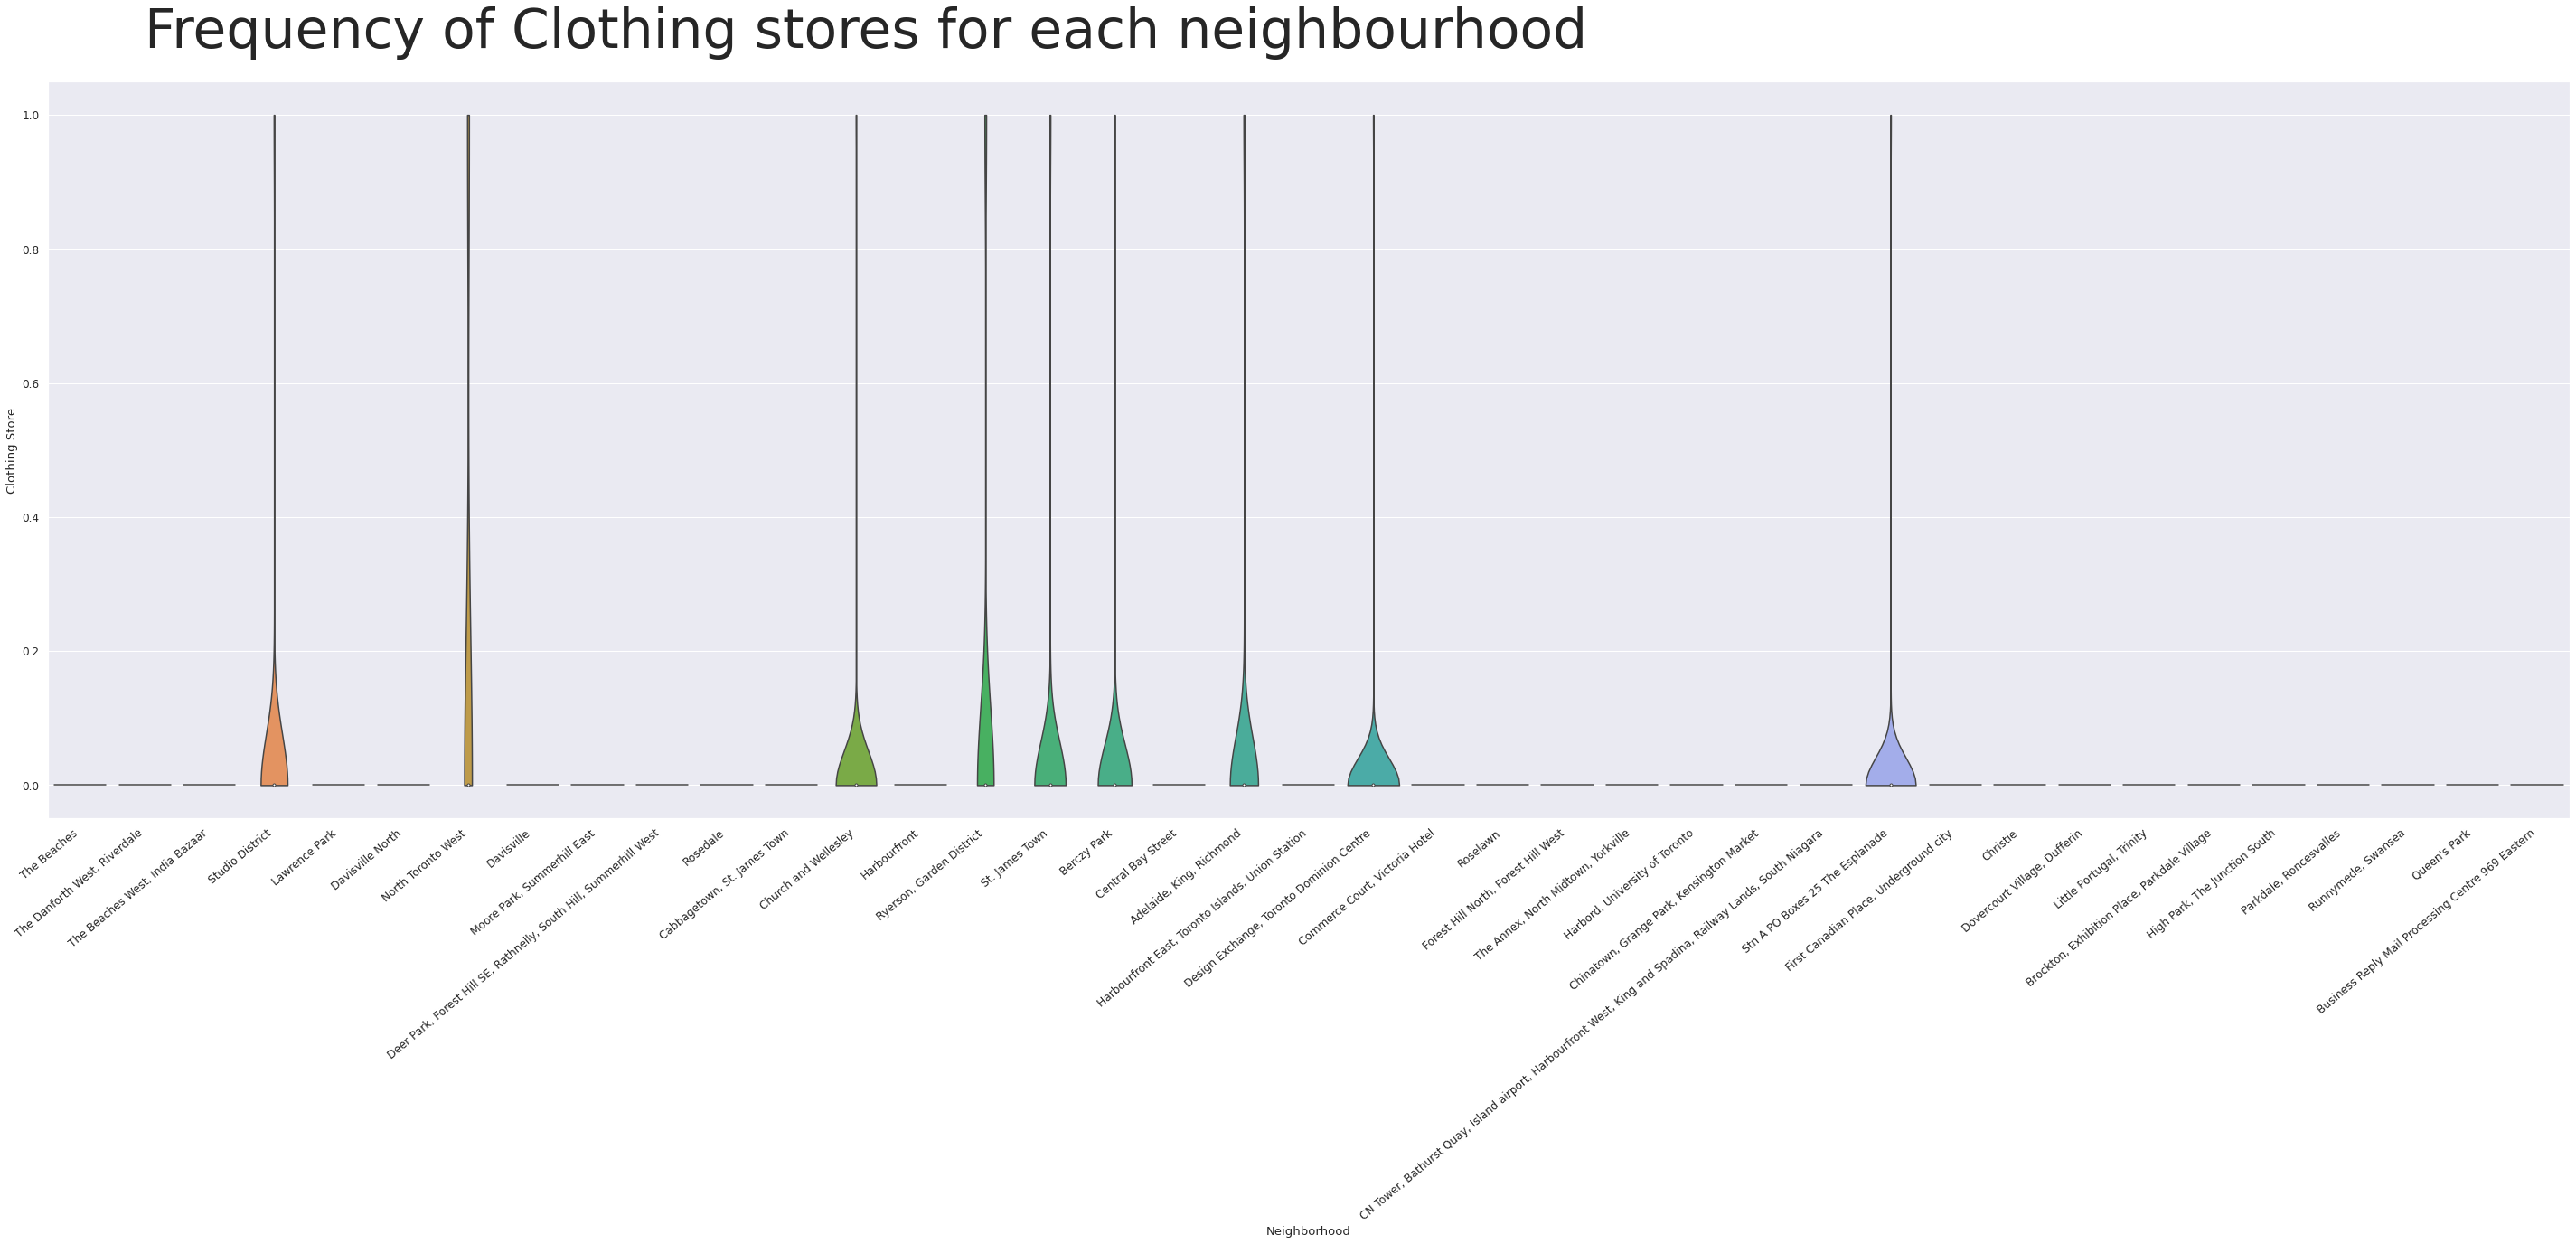

In [28]:
# Add the Clothing_Store to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=tor_onehot, cut=0);
#plt.xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.text(1.0, 1.1, 'Frequency of Clothing stores for each neighbourhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Clothing_Venues.png", dpi=240)
plt.show()

So far found that only below neighbourhoods are having clothing store so for further analysis we will focus on these neighbourhoods only.
 - Studio District    
 - North Toronto West    
 - Church and Wellesley    
 - Ryerson, Garden District    
 - St. James Town    
 - Adelaide, King, Richmond    
 - Design Exchange, Toronto Dominion Centre


In [29]:
#creating a data frame containing records for only above neighbourhoods. 
tor_nb_filter = tor_onehot[(tor_onehot['Neighborhood'] == "Studio District") | (tor_onehot['Neighborhood'] == "North Toronto West") | (tor_onehot['Neighborhood'] == "Church and Wellesley")| 
           (tor_onehot['Neighborhood'] == "Ryerson, Garden District")| (tor_onehot['Neighborhood'] == "St. James Town")| (tor_onehot['Neighborhood'] == "Adelaide, King, Richmond")|
           (tor_onehot['Neighborhood'] == "Design Exchange, Toronto Dominion Centre")]
tor_nb_filter.shape

(507, 231)

# **visualized frequency of occurrence of clothing store, coffee shops, café and restaurants**

As another client criteria for new store location was to have coffee shops, café and restaurants nearby. so, I have further visualized frequency of occurrence of coffee shops, café, restaurants and clothing store in above neighbourhoods.

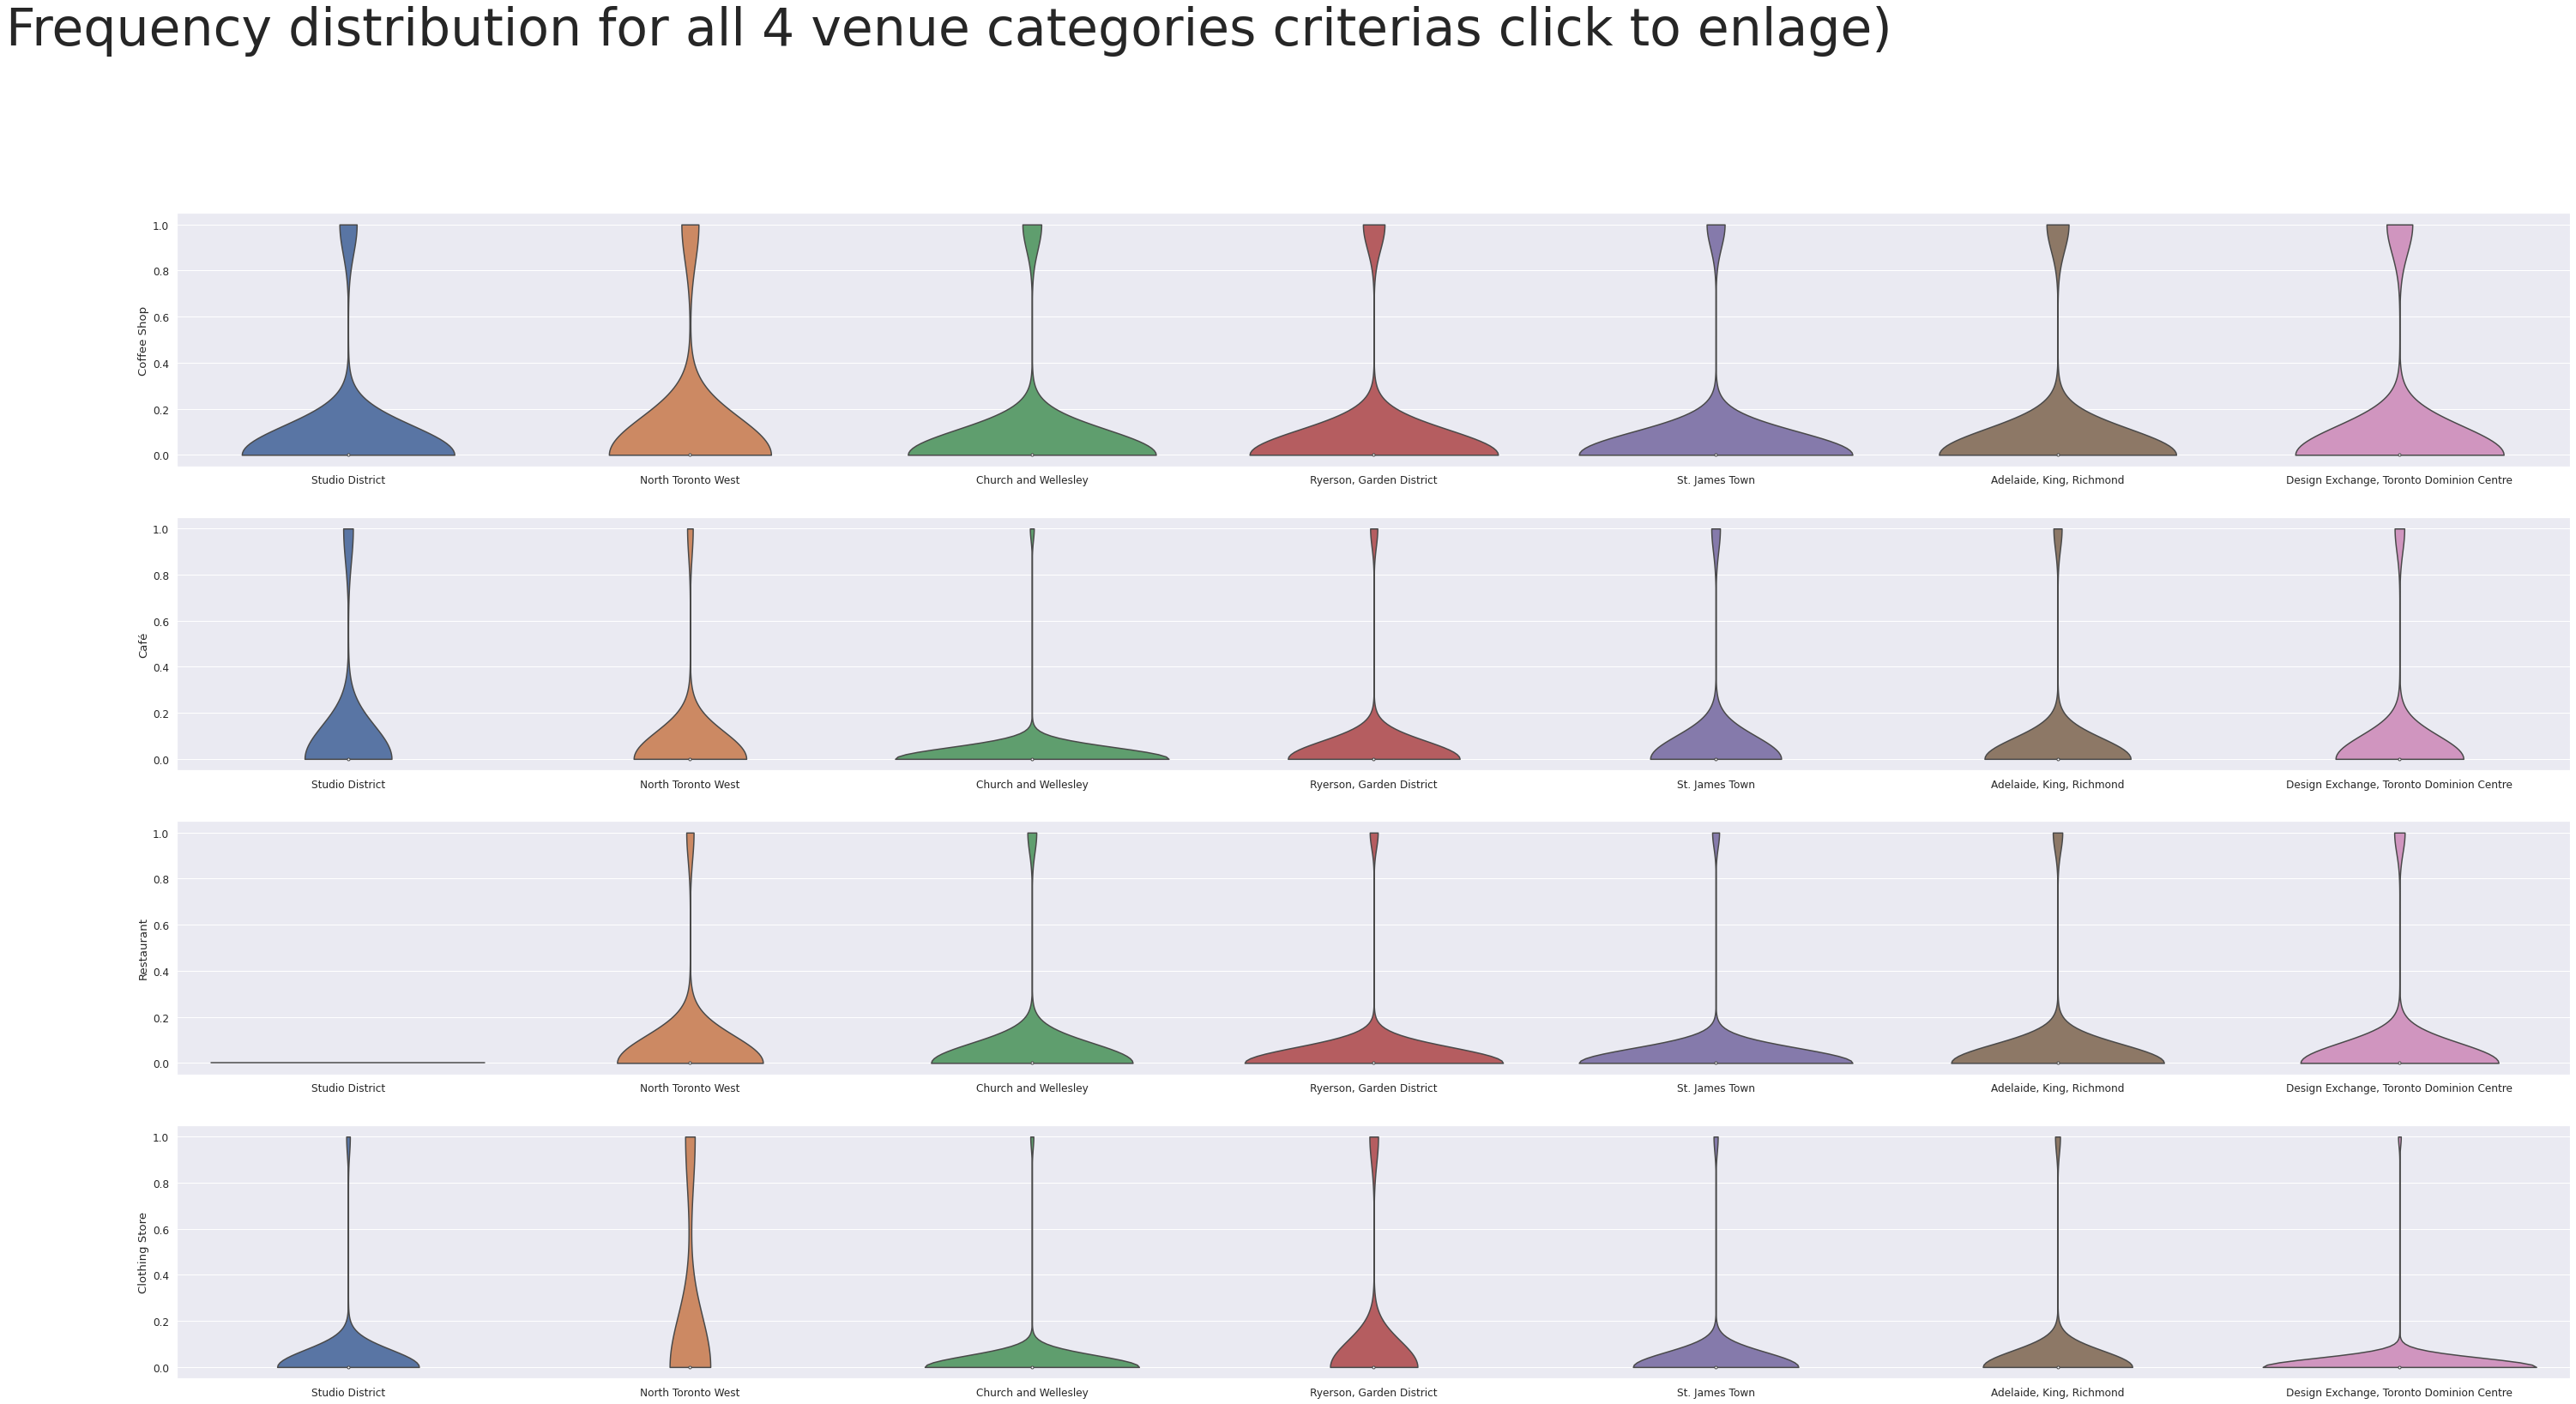

In [31]:
import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="Coffee Shop", data=tor_nb_filter, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=tor_nb_filter, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Restaurant", data=tor_nb_filter, cut=0);
plt.xlabel("")

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=tor_nb_filter, cut=0);
plt.xlabel("")

ax.text(-1.0, 3.1, 'Frequency distribution for all 4 venue categories criterias click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

So, as we can see from the analysis only below neighbourhoods suitable to open new store - according to the client criteria. These neighbourhoods have  specified venues (coffee shops, café, restaurants and clothing store) in a great frequency.
 - Church and Wellesley
 - St. James Town
 - Ryerson, Garden District
 - Adelaide, King, Richmond
 - Design Exchange, Toronto Dominion Centre

Extracting Borough and other details for shortlisted neighbourhoods 

In [32]:
tor_map_location=tor_data[(tor_data['Neighbourhood'] == "Church and Wellesley")| (tor_data['Neighbourhood'] == "St. James Town")
                  |(tor_data['Neighbourhood'] == "Ryerson, Garden District")|(tor_data['Neighbourhood'] == "Adelaide, King, Richmond")
                  |(tor_data['Neighbourhood'] == "Design Exchange, Toronto Dominion Centre")]

tor_map_location

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
52,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
54,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
55,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
58,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568
60,M5K,Downtown Toronto,"Design Exchange, Toronto Dominion Centre",43.647177,-79.381576


# **Result**

# Above 5 neighbourhoods from Borough - Downtown Toronto are potential location for Client's new store. With the help of data analysis and domain knowledge of retail & marketing, I was able to narrow it down to above. 

# These neighbours have met the criteria set by client as they are lively with Coffee shops, Restaurants, Cafés and Clothing Stores. this will provide a good exposure and eventually help drive traffic into new store. 

# I have visualized geographic details of shortlisted neighbourhoods. I have created a map of Toronto by using latitude and longitude values to get the visual as below:

In [33]:
map_downtown_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(tor_map_location['Latitude'], tor_map_location['Longitude'], tor_map_location['Borough'], tor_map_location['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_downtown_toronto)  
    
map_downtown_toronto

# **Discussion**

It is obvious these neighbourhoods are all very centrally located, locations fitting the criteria for popular venues would normally be in central locations in many cities of the world.

From this visualisation it is clear that on a practical level, with no data to base decisions on, researching and then visiting all the neighbourhoods would be a daunting and time-consuming task. We have narrowed the search area down significantly from 39 neighbourhoods to 5 that should suit the client's retail business.

I have made inferences from the data in making the location recommendations, but that is exactly the point. There is no right or wrong answer or conclusion for the task at hand. The job of data analysis here is to steer a course for the location selection of new stores (i) to meet the criteria of being in neighbourhoods that are lively and (ii) to narrow the search down to just a few of the main areas that are best suited to match the criteria.


# **Conclusion**

There are many ways this analysis could have been performed based on different methodology and perhaps different data sources. I chose the method I selected as it was a straightforward way to narrow down the options, not complicating what is simple in many ways – meeting the criteria for the surrounding venues, and in my case, domain knowledge I have on the subject. I originally intended to use the clustering algorithms to cluster the data, but as it progressed it became obvious that this only complicated the task at hand. The analysis and results are not an end point, but rather a starting point that will guide the next part of the process to find specific store locations. The next part will involve domain knowledge of the industry, and perhaps, of the city itself. But the data analysis and resulting recommendations have greatly narrowed down the best options based on data and what we can infer from it.

Without leveraging data to make focussed decisions, the process could have been drawn out and resulted in new stores opening in sub-standard areas for this retailer. Data has helped to provide a better strategy and way forward, these data-driven decisions will lead to a better solution in the end.


# **Limitation**

The accuracy of data depends purely depends on the data provided by FourSquare. 

# **Future Direction**

In future, including financial data can help in improving the predictions.